Reduce overfitting with BatchNormalization, Dropout, and L2 regularization


In [8]:
#import tensorflow and their libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
# Import MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
#Network Parametes
NUM_CLASSES =10

#Reshape 28x28 pixel images to a 'flatten' array of 784 pixels
RESHAPED = 784

#Number of neurons in a hidden layer
HIDDEN_NEURONS = 256

IMG_ROWS, IMG_COLS = 28,28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

In [10]:
#Load the fashion MNIST dataset
fashion_data =tf.keras.datasets.fashion_mnist

#Split between 60,000 train samples and 10,000 test samples
(train_images, train_labels), (test_images, test_labels)=fashion_data.load_data()

#RESHAPE
train_images = train_images.reshape(60000, IMG_ROWS, IMG_COLS,1)
test_images = test_images.reshape(10000, IMG_ROWS, IMG_COLS,1)

train_images,test_images = train_images/255.0, test_images/255.0


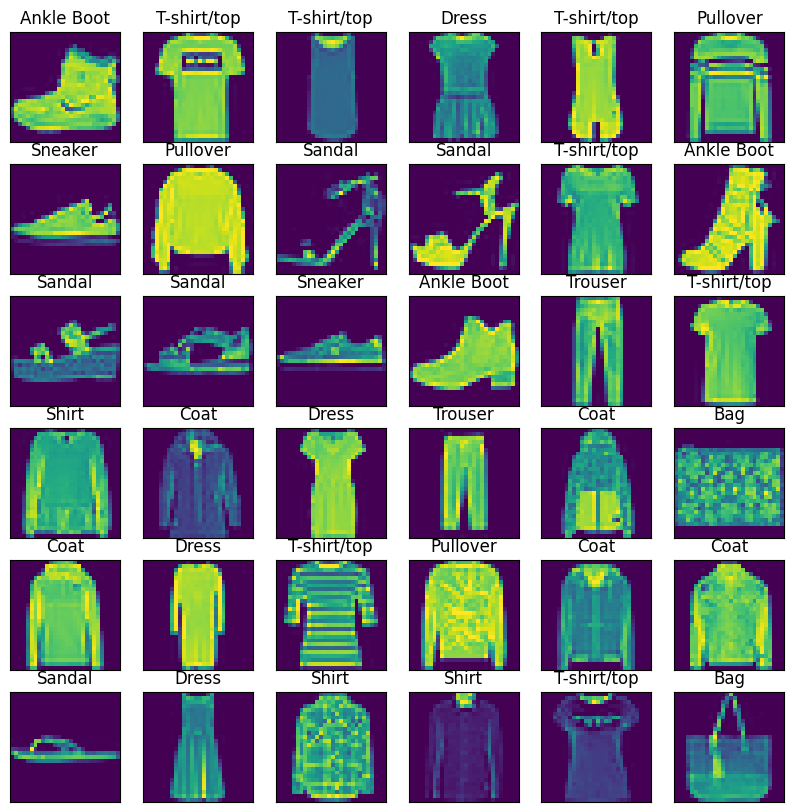

In [11]:
#Visualization
#Create a dictionary for each type of label
labels ={0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat",
         5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
  label_index=train_labels[i]
  plt.title(labels[label_index])
plt.show()


In [12]:
train_labels= tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels= tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [13]:
#define the architecture of our convolutional neural network ,including
#dropout layers and 12 regularization
class cnn_fmnist:
    @staticmethod
    def build(input_shape, classes, use_l2_reg=False, l2_loss_lambda=0.0025):
        l2=regularizers.l2(l2_loss_lambda) if use_l2_reg else None
        #printing this as we cannot visualize L2 Normalization
        #applied to a layer
        if l2 is not None: print('Using L2 regularization %.6f'%l2_loss_lambda)

        model = Sequential([
            #CONV => RELU => POOL
               Conv2D(32, kernel_size=(3,3), padding='same', input_shape=input_shape,
                      activation='relu',kernel_regularizer=l2),
               MaxPooling2D(pool_size=(2,2)),
               BatchNormalization(),
               Dropout(0.15),

               #CONV => RELU => POOL
               Conv2D(64, kernel_size=(3,3), padding='same', activation='relu',
                      kernel_regularizer=l2),
               MaxPooling2D(pool_size=(2,2)),
               BatchNormalization(),
               Dropout(0.2),


               #CONV => RELU =>POOL
               Conv2D(128,kernel_size=(3,3),activation ='relu' , padding='same',
               kernel_regularizer=l2),
               MaxPooling2D(pool_size=(2,2)),
               BatchNormalization(),
               Dropout(0.3),

               #Flatten => RELU layers
               Flatten(),
               Dropout(0.4),

               Dense(1024, activation='relu',kernel_regularizer=l2),
               Dropout(0.4),

               Dense(512,activation ='relu',kernel_regularizer=l2),
               Dropout(0.2),

 # Add a final Dense layer with 10 neurons and softmax activation
               Dense(NUM_CLASSES, activation='softmax') # This layer should have 'classes' neurons
            ]
        )
        return model


In [14]:
#title
#initialize the optimizer and model
model=cnn_fmnist.build(input_shape=INPUT_SHAPE,classes=NUM_CLASSES,
                       use_l2_reg=True)
adam=Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Using L2 regularization 0.002500


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,180,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,804,170 (6.88 MB)

 Trainable params: 1,803,722 (6.88 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
#Training parameters
BATCH_SIZE=128
EPOCHS=50
VALIDATION_SPLIT=0.2#how much of the training set is reversed for validation

In [16]:
#Training the model
history=model.fit(train_images, train_labels, batch_size=BATCH_SIZE,epochs=EPOCHS,
                  validation_split=VALIDATION_SPLIT, verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.5289 - loss: 6.0447 - val_accuracy: 0.4304 - val_loss: 5.9909
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7517 - loss: 4.7913 - val_accuracy: 0.8091 - val_loss: 4.2331
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7922 - loss: 4.1415 - val_accuracy: 0.8423 - val_loss: 3.5986
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8157 - loss: 3.5422 - val_accuracy: 0.8635 - val_loss: 3.0471
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8353 - loss: 3.0034 - val_accuracy: 0.8704 - val_loss: 2.5838
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8496 - loss: 2.5375 - val_accuracy: 0.8736 - val_loss: 2.1813
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8583 - loss: 2.1342 - val_accuracy: 0.8855 - val_loss: 1.8173
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8689 - loss: 1.7933 - val_accuracy:

In [17]:
score=model.evaluate(test_images, test_labels)
print("\nTest score:",score[0])
print("\nTest accuracy:",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9256 - loss: 0.3222

Test score: 0.3129890561103821

Test accuracy: 0.9280999898910522


Text(0.5, 1.0, 'Train - Accuracy')

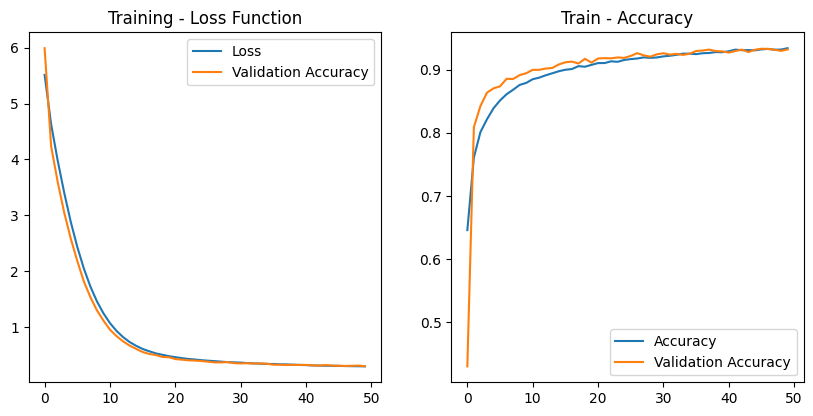

In [18]:
#Plot the loss and accuracy functions for the training and validation sets
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Validation Accuracy')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')